<a href="https://colab.research.google.com/github/Pemijimoh/Hamoye-Internship-Projects/blob/main/stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage E: Tag Along Project**
**Building time series forecasting models for measurements of electricity prices of a District**

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from prophet import Prophet

In [2]:
# load data

df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
# check data shape
df.shape

(92016, 5)

In [4]:
# check for missing values in the data 
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
# convert date column datatype from object to datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

In [6]:
# check data types
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

### **Q.11**
**Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?**

In [7]:
# resample the data to daily sampling rate
df_resampled = df.set_index('FullDate').resample('D').sum()

In [8]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


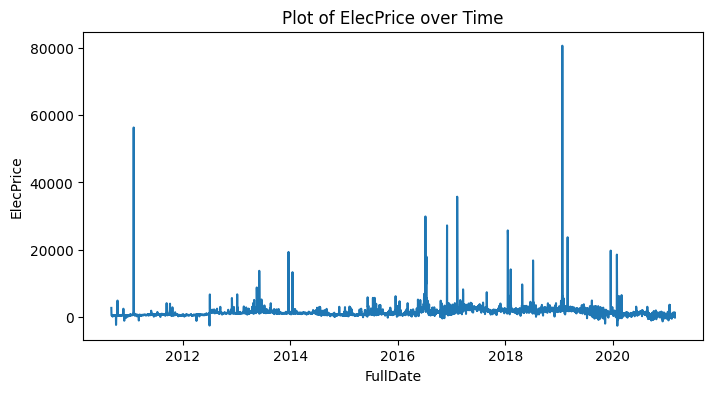

In [9]:
# plot of ElecPrice over Time

plt.figure(figsize=(8,4))
sns.lineplot(y='ElecPrice', x=df_resampled.index, data=df_resampled);
plt.title('Plot of ElecPrice over Time');

### **Q.12**
**Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?**

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the sample data
result = adfuller(df_resampled.SysLoad)

# Print the results
print('ADF Statistic: %6f' % result[0])
print('p-value: %6f' % result[1])

ADF Statistic: -3.690159
p-value: 0.004254


In [11]:
# Perform ADF test on the sample data
result = adfuller(df_resampled.GasPrice)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.902767
p-value: 0.045027


### **Q.13**
**Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?**

In [12]:
# critical values for GasPrice

gas_result = adfuller(df_resampled['GasPrice'])

print('Critical Values:')
for key, value in result[4].items():
    if key == '10%':
        print('\t%s: %.4f' % (key, value))
    elif key == '5%':
        print('\t%s: %.4f' % (key, value))

Critical Values:
	5%: -2.8623
	10%: -2.5672


In [13]:
# Critical Values for ElecPrice 
elec_result = adfuller(df_resampled['ElecPrice'])

print('Critical Values:')
for key, value in result[4].items():
    if key == '10%':
        print('\t%s: %.4f' % (key, value))
    elif key == '5%':
        print('\t%s: %.4f' % (key, value))

Critical Values:
	5%: -2.8623
	10%: -2.5672


### **Univariate Time Series Modeling**

In [14]:
df = df_resampled.reset_index()

In [15]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [16]:
# make a copy before prediction
uts_df = df.copy()

In [17]:
# rename columns
uts_df = uts_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

In [18]:
# split data into train and  test
train_df = uts_df[:2757]
test_df = uts_df[2757:]

In [19]:
model = Prophet() 

#train the model
model.fit(train_df[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/3nt4oeca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/tldzx56p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17794', 'data', 'file=/tmp/tmppfh0khcj/3nt4oeca.json', 'init=/tmp/tmppfh0khcj/tldzx56p.json', 'output', 'file=/tmp/tmppfh0khcj/prophet_modelxp54_mxw/prophet_model-20230404205526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# predict on the test set
forecast = model.predict(test_df[['ds']])
forecast.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,162.034963,4845.909594,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,402.484954,5004.627597,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,272.556420,5196.707906,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,100.365007,5002.862135,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051


### **Q.14**
**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
mape = mean_absolute_percentage_error(test_df.y, forecast.yhat)
print('MAPE Value: ',round(mape,2))

MAPE Value:  546.46


### **Q.15**
**What is the RMSE in 2 decimal places?**

In [23]:
# performance evaluation using mean sqaured error
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test_df.y, forecast.yhat))
print("The MAPE is :", round(rms,2))

The MAPE is : 3211.82


### **Q.16**
**If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?**

<Figure size 1200x600 with 0 Axes>

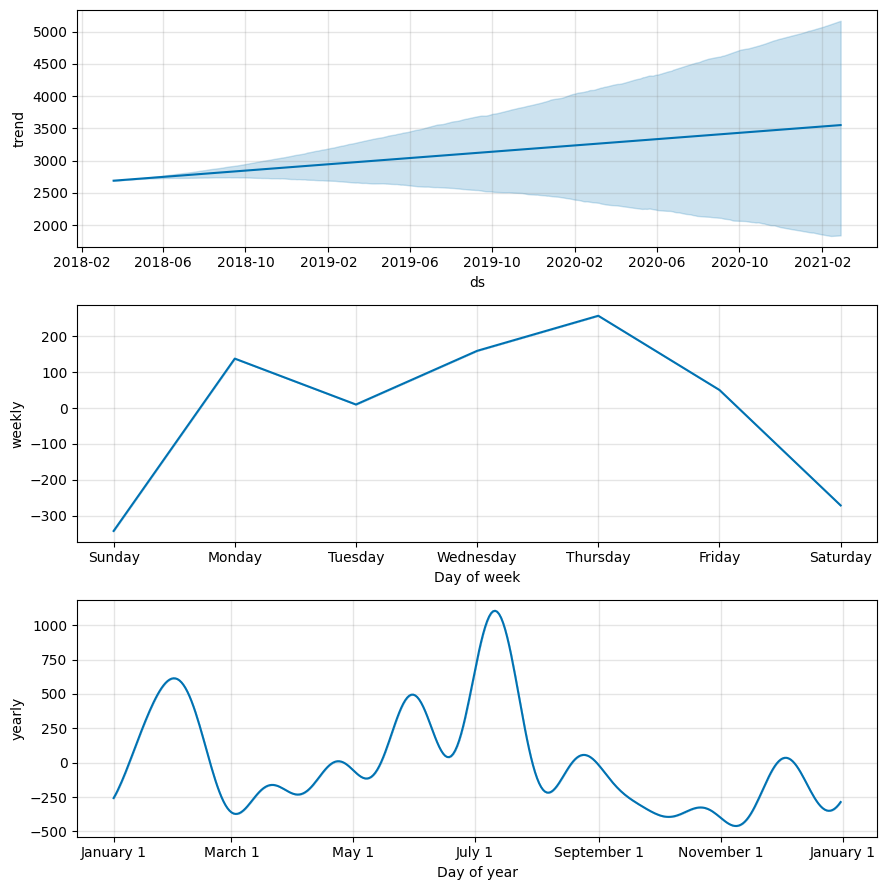

In [24]:
# plot the components fromm the forecasted model
plt.figure(figsize=(12,6))
model.plot_components(forecast)
plt.show();

###**Multivariate Time Series**

In [25]:
# make a copy of previous data
mts_df = df.copy()

In [26]:
# rename columns
mts_df = mts_df.rename(columns={'FullDate': 'ds', 'Tmax':'add1', 'SysLoad':'add2', 'GasPrice':'add3', 'ElecPrice': 'y'})
mts_df.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [27]:
# Train the model

mts_model = Prophet()

mts_model.add_regressor('add1')
mts_model.add_regressor('add2')
mts_model.add_regressor('add3')

In [28]:
# split the data
mtrain_df = mts_df[:2757]
mtest_df = mts_df[2757:]

In [29]:
# train the model
mts_model.fit(mtrain_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/qhh8cq7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/1qnz516u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48880', 'data', 'file=/tmp/tmppfh0khcj/qhh8cq7p.json', 'init=/tmp/tmppfh0khcj/1qnz516u.json', 'output', 'file=/tmp/tmppfh0khcj/prophet_modelzdyjpq6t/prophet_model-20230404205618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
m_forecast = mts_model.predict(mtest_df)
m_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.593424,-295.361535,4156.489633,1866.593424,1866.593424,0.236126,0.236126,0.236126,-856.277661,...,-84.510903,-84.510903,-84.510903,-38.986966,-38.986966,-38.986966,0.0,0.0,0.0,1986.481746
1,2018-03-21,1867.280437,-202.354173,4133.241896,1867.280437,1867.280437,0.233325,0.233325,0.233325,-1026.270781,...,42.485972,42.485972,42.485972,-29.705167,-29.705167,-29.705167,0.0,0.0,0.0,1977.881009
2,2018-03-22,1867.967450,720.585418,5123.307429,1867.967450,1867.967450,0.219750,0.219750,0.219750,-214.933731,...,145.600772,145.600772,145.600772,-24.679410,-24.679410,-24.679410,0.0,0.0,0.0,2898.032054
3,2018-03-23,1868.654463,463.675782,4930.138963,1868.654463,1868.654463,0.211777,0.211777,0.211777,-274.864996,...,-44.330838,-44.330838,-44.330838,-23.768264,-23.768264,-23.768264,0.0,0.0,0.0,2582.235531
4,2018-03-24,1869.341476,-674.209536,3750.331263,1869.341476,1869.341476,0.209838,0.209838,0.209838,-1076.310143,...,-117.507690,-117.507690,-117.507690,-26.720907,-26.720907,-26.720907,0.0,0.0,0.0,1435.426378


### **Q.17**
**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [31]:
#performance evaluation using mean absolute percentage error
mape2 = mean_absolute_percentage_error(mtest_df.y, m_forecast.yhat)
print('MAPE Value: ',round(mape2,2))

MAPE Value:  231.6


### **Q.18**
**What is the RMSE in 2 decimal places?**

In [32]:
# performance evaluation using mean sqaured error
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(mtest_df.y, m_forecast.yhat))
print("The MAPE is :", round(rms,2))

The MAPE is : 2707.29


### **Q.19**
**If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?**

<Figure size 1200x600 with 0 Axes>

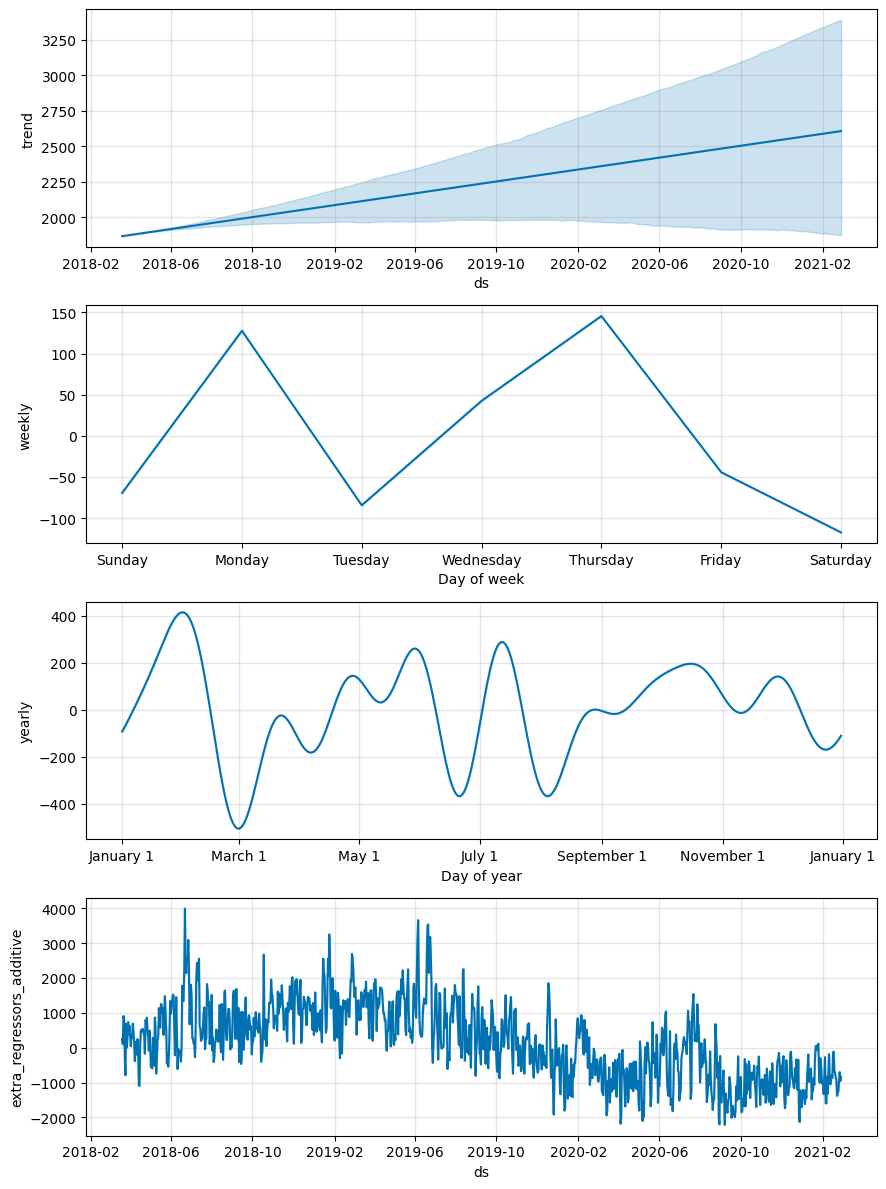

In [34]:
# plot the components fromm the forecasted model
plt.figure(figsize=(12,6))
mts_model.plot_components(m_forecast)
plt.show();

### **Second Multivariate Time Series Model**
**Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max)**

In [35]:
mts2_df = df.copy()

In [36]:
# rename columns
mts2_df = mts2_df.rename(columns={'FullDate': 'ds', 'Tmax':'add1', 'SysLoad':'add2', 'GasPrice':'add3', 'ElecPrice': 'y'})
mts2_df.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


**Note: Since Tmax is renamed as add1, add 1 will be dropped.**

In [37]:
# drop Tmax(add1)
mts2_df.drop(columns = ['add1'], inplace=True)
mts2_df.columns

Index(['ds', 'add2', 'add3', 'y'], dtype='object')

In [38]:
# Train the model

mts2_model = Prophet()

mts2_model.add_regressor('add2')
mts2_model.add_regressor('add3')

In [39]:
# split the data
m2_train = mts2_df[:2757]
m2_test = mts2_df[2757:]

In [40]:
# train the model
mts2_model.fit(m2_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/1mca0npq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppfh0khcj/_5nci52t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75278', 'data', 'file=/tmp/tmppfh0khcj/1mca0npq.json', 'init=/tmp/tmppfh0khcj/_5nci52t.json', 'output', 'file=/tmp/tmppfh0khcj/prophet_modelf0jftlgs/prophet_model-20230404210349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:03:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
m2_forecast = mts2_model.predict(m2_test)
m2_forecast.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add2,add2_lower,add2_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1867.410717,-155.448887,4287.940510,1867.410717,1867.410717,-856.302598,-856.302598,-856.302598,1100.720231,...,-84.284361,-84.284361,-84.284361,-38.791479,-38.791479,-38.791479,0.0,0.0,0.0,1988.752510
1,2018-03-21,1868.104240,-60.920830,4381.144087,1868.104240,1868.104240,-1026.300669,-1026.300669,-1026.300669,1125.178448,...,42.682305,42.682305,42.682305,-29.498186,-29.498186,-29.498186,0.0,0.0,0.0,1980.166139
2,2018-03-22,1868.797763,739.667689,4991.636806,1868.797763,1868.797763,-214.939991,-214.939991,-214.939991,1125.178448,...,145.286035,145.286035,145.286035,-24.457953,-24.457953,-24.457953,0.0,0.0,0.0,2899.864303
3,2018-03-23,1869.491286,427.773442,4796.424686,1869.491286,1869.491286,-274.873001,-274.873001,-274.873001,1057.575232,...,-44.094332,-44.094332,-44.094332,-23.529598,-23.529598,-23.529598,0.0,0.0,0.0,2584.569587


### **Q.20**
**What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [42]:
#performance evaluation using mean absolute percentage error
mape3 = mean_absolute_percentage_error(m2_test.y, m2_forecast.yhat)
print('MAPE Value: ',round(mape3,2))

MAPE Value:  232.84
